# COVID-19 Data Analysis

CMSC320 Final Project


Author: Kun Zhou, Qizhao Tang


## 1. Introduction
Coronavirus, also called COVID-19, is a group of related RNA viruses that cause diseases. This virus outbreaked a pandemic. This virus could cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of having trouble breathing, persistent chest pain or pressure, and so on. According to CDC, this virus is deadly to humans. Additionally, COVID-19 is soon widely spread worldwide until WHO declared the outbreak a Public Health Emergency of International Conern on 30 January 2020. In this project, we will be collecting data from https://covidtracking.com. Besides, we will do data visualization to show how this virus spread in United States from April to November. Based on our collected data and prediction models, we will make predictions on death increase, hospitalization increase. 

## 2. Install Packages

In [ ]:
pip install numpy pandas matplotlib sklearn stats graphviz pydot

## 3. Data Tidying

Firstly, we load the data from "https://api.covidtracking.com/v1/us/daily.csv". The website that we use, https://covidtracking.com, is the authoritative website that was cited by John Hopkins and The White House. The dataset in this website updates twice in a day. Since the dataset that we download contains the missing data at the beginning of the outbreak of the COVID-19. Threfore, we will eliminate columns that have nothing to do with our analysis. Since Coronavirus data is updated twice every day, we will only be using data from the beginning of April to the end of November to do our data analysis. Due to COVID-19 has a very long incubation period, the death number in each day is relative to the positive case confirmed before. We shifts the death related data offset by **-17** days.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_covid_data = pd.read_csv("https://api.covidtracking.com/v1/us/daily.csv")
raw_covid_data.drop(["states", "dateChecked", "lastModified", "posNeg", "total", "hash", "inIcuCurrently", "inIcuCumulative", 
                     "onVentilatorCurrently", "totalTestResultsIncrease", "onVentilatorCumulative", "recovered", "totalTestResults", 
                     "negativeIncrease", "pending", "hospitalizedCurrently", "hospitalizedCumulative"], axis=1, inplace=True)
covid_data = raw_covid_data[(raw_covid_data['date'] >= 20200401) & (raw_covid_data['date'] <= 20201130)]
covid_data.shift(periods=-17)
covid_data.reset_index()
covid_data.head(10)

,date,positive,negative,death,hospitalized,deathIncrease,hospitalizedIncrease,positiveIncrease
18,20201130,13463395.0,154112956.0,259697.0,559871.0,1035,3394,148588
19,20201129,13314807.0,152906226.0,258662.0,556477.0,823,2429,136247
20,20201128,13178560.0,152036674.0,257839.0,554048.0,1251,3404,151184
21,20201127,13027376.0,150826280.0,256588.0,550644.0,1392,3499,197180
22,20201126,12830196.0,149421572.0,255196.0,547145.0,1387,2247,128709
23,20201125,12701487.0,148522805.0,253809.0,544898.0,2280,4568,187134
24,20201124,12514353.0,147311323.0,251529.0,540330.0,2106,4591,164392
25,20201123,12349961.0,145926485.0,249423.0,535739.0,858,2985,153783
26,20201122,12196178.0,144656088.0,248565.0,532754.0,917,2291,153372
27,20201121,12042806.0,143409545.0,247648.0,530463.0,1554,3340,182809


In [ ]:
state_covid_data = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")
state_covid_data.drop(["dateChecked", "pending", "posNeg", "total", "lastUpdateEt", "dateModified", "checkTimeEt", "hash", "grade", "score", "positiveScore", "negativeScore", 
                       "negativeRegularScore", "commercialScore", "totalTestEncountersViral", "positiveTestsPeopleAntibody", 
                       "negativeTestsPeopleAntibody", "totalTestsPeopleAntigen", "totalTestsPeopleAntibody", "negativeTestsAntibody", 
                       "positiveTestsAntibody", "totalTestsAntibody", "totalTestsPeopleViral", "deathProbable", "inIcuCumulative", "probableCases", 
                       "totalTestResultsSource", "totalTestResults","fips","totalTestsAntigen","positiveTestsAntigen","positiveTestsPeopleAntigen","dataQualityGrade","inIcuCurrently",
                       "onVentilatorCurrently","onVentilatorCumulative","recovered","positiveTestsViral", "negativeTestsViral","positiveCasesViral","totalTestsViral"], axis=1, inplace=True)
state_covid_data = state_covid_data[(state_covid_data['date'] >= 20200401) & (state_covid_data['date'] <= 20201130)]
state_covid_data.head(10)

,date,state,positive,negative,hospitalizedCurrently,hospitalizedCumulative,death,hospitalized,deathConfirmed,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
1008,20201130,AK,31323.0,980073.0,162.0,725.0,121.0,725.0,121.0,507,4709,5216,0,3
1009,20201130,AL,249524.0,1376324.0,1717.0,25338.0,3578.0,25338.0,3246.0,2295,2554,4634,1,668
1010,20201130,AR,157359.0,1545401.0,1063.0,8937.0,2502.0,8937.0,2295.0,1112,6663,7629,32,94
1011,20201130,AS,0.0,1988.0,NaN,NaN,0.0,NaN,NaN,0,0,0,0,0
1012,20201130,AZ,326817.0,1936949.0,2513.0,25786.0,6639.0,25786.0,6152.0,822,16630,22500,5,218
1013,20201130,CA,1212968.0,22812203.0,8578.0,NaN,19141.0,NaN,NaN,14034,203636,217670,20,0
1014,20201130,CO,232905.0,1531344.0,1940.0,13488.0,3037.0,13488.0,2561.0,4133,12038,43725,34,60
1015,20201130,CT,117295.0,3144159.0,1098.0,12257.0,5020.0,12257.0,4025.0,4714,102123,106837,59,0
1016,20201130,DC,21552.0,673704.0,158.0,NaN,680.0,NaN,NaN,104,4810,4914,0,0
1017,20201130,DE,35654.0,388688.0,243.0,NaN,772.0,NaN,679.0,403,1555,10970,2,0


Now, we have two important dataset for our analysis, which contains the information about COVID-19 everyday positive cases increase, deaths increase, hospitalizations increase. Also, it has total positive, negative, death, and hospitalized cases.  Compared with the first datase, the second dataset has one more important column, states.

## 4. Data Analysis and Visualization


### 4.1 Hypothesis Testing
Firstly, we assume that there is positive relationship between confirmed cases increase and deaths increase. Then we will do Hypothesis Testing. We will use paired sampled t-test. 
- Null Hypothesis: there is no relationship between confirmed cases increase and deaths increase. 
- Alternative Hypothesis: there is relationship between confirmed cases increases and deaths increase. 


In [ ]:
from scipy import stats
covid_data = covid_data.iloc[::-1]
ttest,p_value = stats.ttest_rel(covid_data['positiveIncrease'], covid_data['deathIncrease'])
print(p_value)

8.180684335968525e-57


From the paired-test, we get the p-value that is 6.306550299811238e-57, which is less than 0.05. Therefore, we reject the null hypothesis, which implies that there is relationship between positives cases increases and deaths increase. Therefore, this confirm our assumption that there is positive relationship between positive cases increase  and deaths increase. 

Now, in order to do prediction of death increase and hospitalizations increase. We will plot the monthly and daily average deaths increase, and monthly and daily average hospitalization increase to get the general picture. 

### 4.2 Graph of monthly hospitalization increase

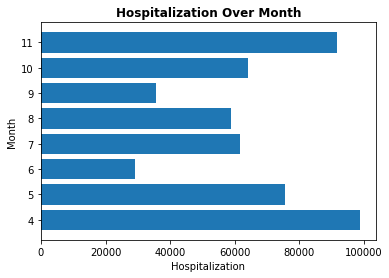

In [ ]:
month_hos = dict()
month = 4
for i in range(4, 12):
  month_hos[i] = 0
for column,row in covid_data.iterrows():
  if int(str(row['date'])[4:6]) == month:
    month_hos[int(str(row['date'])[4:6])] += covid_data.at[column, 'hospitalizedIncrease']
  else:
    month += 1

hospermonth = pd.DataFrame(month_hos.items(), columns=['month', 'hospitalization'])
plt.barh(hospermonth['month'], hospermonth['hospitalization'])
plt.ylabel('Month')
plt.xlabel('Hospitalization')
plt.title('Hospitalization Over Month', fontweight = "bold")
plt.show()

### 4.3 Plot of showing daily hospitalization increase 

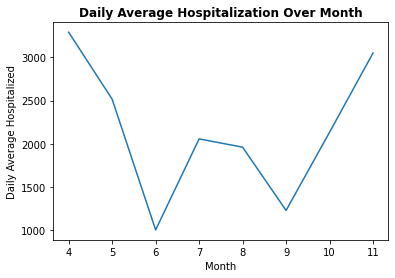

In [ ]:
month_avg_hos = dict()
month = 4
count = 0
for i in range(4, 12):
  month_avg_hos[i] = 0
for column,row in covid_data.iterrows():
  if int(str(row['date'])[4:6]) == month:
    month_avg_hos[int(str(row['date'])[4:6])] += covid_data.at[column, 'hospitalizedIncrease']
    count += 1
  else:
    month_avg_hos[month] = month_avg_hos[month] / count
    count = 0
    month += 1
month_avg_hos[11] = month_avg_hos[11] / 30
hos_avg_month = pd.DataFrame(month_avg_hos.items(), columns=['month', 'avg_hos'])
plt.plot(hos_avg_month['month'], hos_avg_month['avg_hos'])
plt.xlabel('Month')
plt.ylabel('Daily Average Hospitalized')
plt.title('Daily Average Hospitalization Over Month', fontweight = "bold")
plt.show()

### 4.4 Graph of Monthly Death Increase

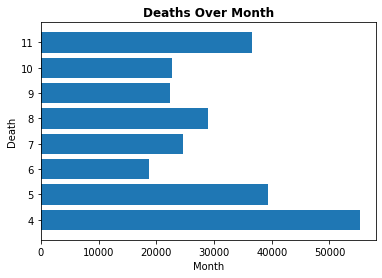

In [ ]:
month_death = dict()
month = 4
for i in range(4, 12):
  month_death[i] = 0
for column,row in covid_data.iterrows():
  if int(str(row['date'])[4:6]) == month:
    month_death[int(str(row['date'])[4:6])] += covid_data.at[column, 'deathIncrease']
  else:
    month += 1

death_month = pd.DataFrame(month_death.items(), columns=['month', 'death'])
plt.barh(death_month['month'], death_month['death'])
plt.xlabel('Month')
plt.ylabel('Death')
plt.title('Deaths Over Month',fontweight = "bold")
plt.show()

### 4.5 Plot of Daily Death Increase

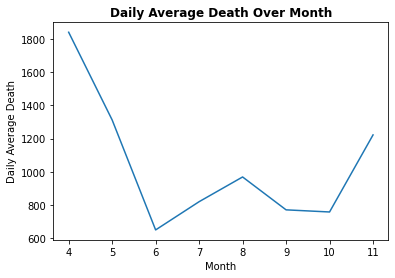

In [ ]:
month_avg_death = dict()
month = 4
count = 0
for i in range(4, 12):
  month_avg_death[i] = 0
for column,row in covid_data.iterrows():
  if int(str(row['date'])[4:6]) == month:
    month_avg_death[int(str(row['date'])[4:6])] += covid_data.at[column, 'deathIncrease']
    count += 1
  else:
    month_avg_death[month] = month_avg_death[month] / count
    count = 0
    month += 1
month_avg_death[11] = month_avg_death[11] / 30
death_avg_month = pd.DataFrame(month_avg_death.items(), columns=['month', 'avg_death'])
plt.plot(death_avg_month['month'], death_avg_month['avg_death'])
plt.xlabel('Month')
plt.ylabel('Daily Average Death')
plt.title('Daily Average Death Over Month', fontweight = "bold")
plt.show()

### 4.6 Plot of Positive Case Confirmed for Each State


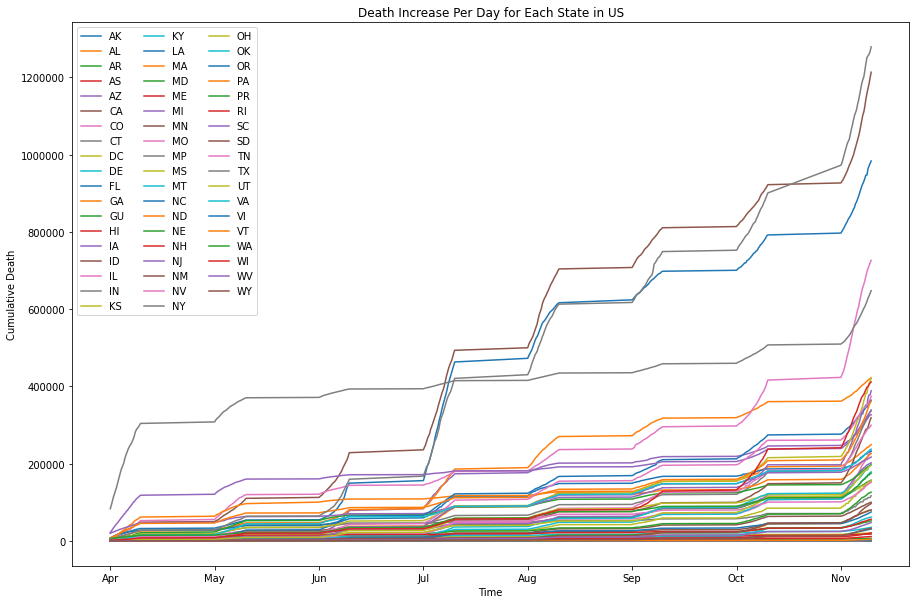

In [ ]:
covid_group_by_state = state_covid_data.groupby('state')
plt.figure(figsize=(15, 10))
for state, data in covid_group_by_state:
  plt.plot(data['date'], data['positive'], label=state)
plt.legend(ncol=3)
plt.ticklabel_format(axis='y', style='plain')
month_starts = [20200401,20200501,20200601,20200701,20200801,20200901,20201001,20201101]
month_names = ['Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov'] 
plt.title('Death Increase Per Day for Each State in US')
plt.xlabel('Time')
plt.ylabel('Cumulative Death')
plt.xticks(month_starts,month_names)
plt.show()


### 4.7 Observation

We drew the graphs for total deaths and hospitalizations in a month and daily average deaths and hospitalizations from the beginning of the April to the end of November. 
1. The number of death decreases drastically from April to June. Additionally, daily death increase remains relatively low between June and October, which is less than 1000. 
2. The number of hospitalized people also reduces drastically from April to June. Additionally, daily hospitalization increases from June to July and decreases from August to September. However, the number of daily hospitalized individuals is relatively lower from June to October, which is less than 2000. 
3. Based on the graphs, it can be seen that the number of deaths and hospitalizations are lower in June, July, August, September than other months, which implied that temperature may be one factor that might affect the number of deaths and the number of hospitalized people. 

## 5. Data Prediction
Prediction the future COVID-19 growth rate and death rate is an extremely important.

### 5.1 Importing Packages
We will be using the following packages to train and illustrate our ML model.
1. Using `trian_test_split` to split our data to traning and testing.
2. Using `RandomForestRegressor` to train RF model.
3. Using `SVR` to train SVR model.
3. Using `export_graphviz` to format a dot format for displaying the tree.
4. Using `SVG` from `IPython Dislay` to display the SVG file.
5. Using `pydot` to generate tree graph.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
from IPython.display import SVG
import pydot

### 5.2 Preparing Data for ML
Since Random Forest is a supervised learning model, we have to provide a baseline for the model to calculate the baseline_error and compensate the loss function.

To provide the baseline, we used the research from [JHU Lab](https://coronavirus.jhu.edu/data/mortality) and select the mortality rate of **1.8%** for US.

Due to COVID-19 has a very long incubation period, the death number in each day is relative to the positive case confirmed before. We shifts the death related data offset by **-17** days. 

We will also drop few columns that is irrelevent with this ML model.

In [ ]:
p5_data = raw_covid_data.copy()
p5_data['deathIncreaseAvg'] = p5_data['positiveIncrease'] * 0.018 # Mortality Data from [3]

p5_data.deathIncreaseAvg.shift(periods=-17, fill_value=0)
p5_data.deathIncrease.shift(periods=-17, fill_value=0)
p5_data = p5_data[(p5_data['date'] >= 20200401) & (p5_data['date'] <= 20201130)]
p5_data.reset_index()

p5_labels = np.array(p5_data['deathIncrease'])
p5_data = p5_data.drop(['deathIncrease'], axis=1)
p5_f_list = list(p5_data.columns)
p5_f = np.array(p5_data)

### 5.3 Creating Training & Testing Set
We will seperate our data to a ratio 75% - 25%.

The random state will be set to 100 to ensure the Random Forest ML get enough random selections on our model.

In [ ]:
p5_rf_train_features, p5_rf_test_features, p5_rf_train_labels, p5_rf_test_labels = \
  train_test_split(p5_f, p5_labels, test_size = 0.25, random_state = 100)

p5_svr_train_features, p5_svr_test_features, p5_svr_train_labels, p5_svr_test_labels = \
  train_test_split(p5_f, p5_labels, test_size = 0.25)

p5_rf_baseline_preds = p5_rf_test_features[:, p5_f_list.index('deathIncreaseAvg')]
p5_rf_baseline_errors = abs(p5_rf_baseline_preds - p5_rf_test_labels)

p5_svr_baseline_preds = p5_svr_test_features[:, p5_f_list.index('deathIncreaseAvg')]
p5_svr_baseline_errors = abs(p5_svr_baseline_preds - p5_svr_test_labels)

print('RF Training Features Shape:', p5_rf_train_features.shape)
print('RF Training Labels Shape:', p5_rf_train_labels.shape)
print('RF Testing Features Shape:', p5_rf_test_features.shape)
print('RF Testing Labels Shape:', p5_rf_test_labels.shape)
print('RF Average baseline error: ', round(np.mean(p5_rf_baseline_errors), 2))

print('SVR Training Features Shape:', p5_svr_train_features.shape)
print('SVR Training Labels Shape:', p5_svr_train_labels.shape)
print('SVR Testing Features Shape:', p5_svr_test_features.shape)
print('SVR Testing Labels Shape:', p5_svr_test_labels.shape)
print('SVR Average baseline error: ', round(np.mean(p5_svr_baseline_errors), 2))

RF Training Features Shape: (183, 8)
RF Training Labels Shape: (183,)
RF Testing Features Shape: (61, 8)
RF Testing Labels Shape: (61,)
RF Average baseline error:  639.81
SVR Training Features Shape: (183, 8)
SVR Training Labels Shape: (183,)
SVR Testing Features Shape: (61, 8)
SVR Testing Labels Shape: (61,)
SVR Average baseline error:  626.24


### 5.4 Training Model







#### 5.4.1 Random Forest ML
In this prediction, we will be using Random Forest to conduct a supervised machine learning algorithem. Random Forests are an ensemble learning method for classificatipn, regression and other tasks that operate by constructing a multitude of decision tress at training time and outputting the class that is the mode of the classes or average prediction of the individual trees.

To find the suitable features for predicting deathIncrease, we follow the CDC's research on what factors are causing the death.  

We will run a model with 1000 estimators and 100 random state.

##### 5.4.1.1 Training Model & Accuracy

In [ ]:
p5_rf = RandomForestRegressor(n_estimators = 2000, random_state = 100)
p5_rf.fit(p5_rf_train_features, p5_rf_train_labels)

p5_rf_pred = p5_rf.predict(p5_rf_test_features)
p5_rf_errors = abs(p5_rf_pred - p5_rf_test_labels)

print('Mean Absolute Error:', round(np.mean(p5_rf_errors), 2))

p5_rf_mape = 100 * (p5_rf_errors / p5_rf_test_labels)

p5_rf_accuracy = 100 - np.mean(p5_rf_mape)
print('Accuracy:', round(p5_rf_accuracy, 3), '%.')

Mean Absolute Error: 191.38
Accuracy: 77.96 %.


##### 5.4.1.2 Random Forest Tree Graph
To save space, we will only display 1 tree from RF.

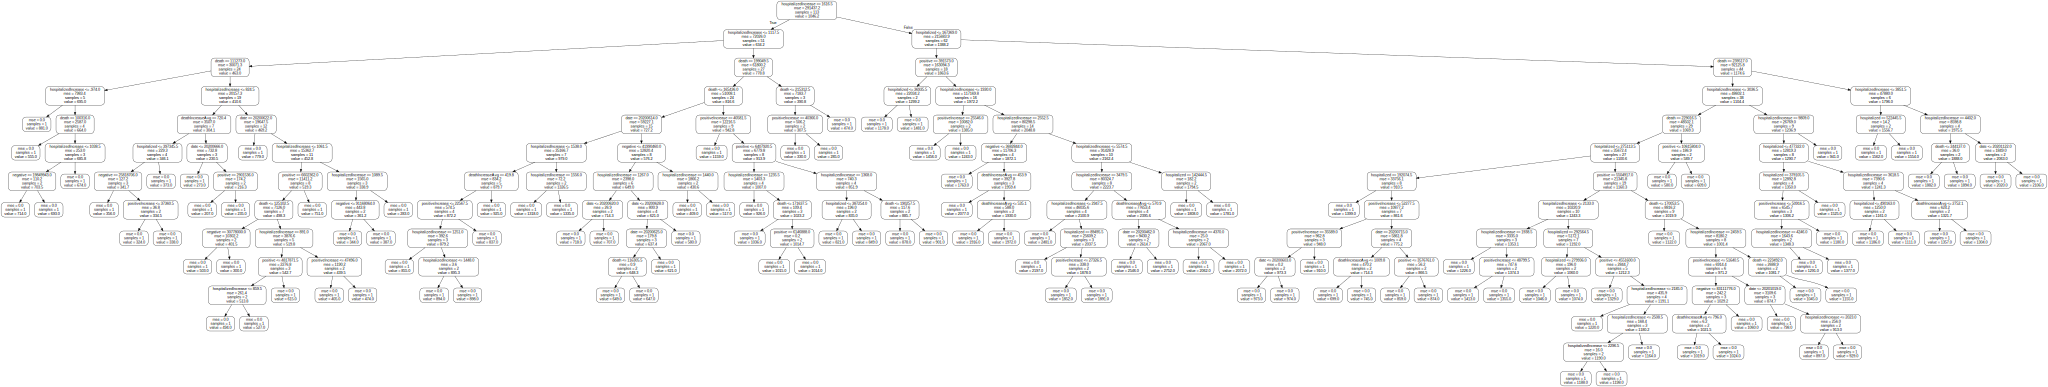

In [ ]:
p5_rf_graph = pydot.graph_from_dot_data(
    export_graphviz(p5_rf.estimators_[5], feature_names = p5_f_list, 
                    rounded = True, precision = 1))
# Write graph to a png file
SVG(p5_rf_graph[0].create_svg())

#### 5.4.2 SVR Learning

**Support Vector Regression(SVR)** gives us the flexibility to define error is acceptable in our model and will find an appropriate line to fit the data. 

##### 5.4.2.1 Training & Accuracy


In [ ]:
p5_svr = SVR()
p5_svr.fit(p5_svr_train_features, p5_svr_train_labels)


p5_svr_pred = p5_svr.predict(p5_svr_test_features)
p5_svr_errors = abs(p5_svr_pred - p5_svr_test_labels)

print('Mean Absolute Error:', round(np.mean(p5_svr_errors), 2))

p5_svr_mape = 100 * (p5_svr_errors / p5_svr_test_labels)

p5_svr_accuracy = 100 - np.mean(p5_svr_mape)
print('Accuracy:', round(p5_svr_accuracy, 3), '%.')

Mean Absolute Error: 430.42
Accuracy: 50.906 %.


### 5.5 Results
Obviously, Random Forest had a much better accuracy than Support Vector Regression. Therefore, we will stick with RF for the following steps.

<function matplotlib.pyplot.show>

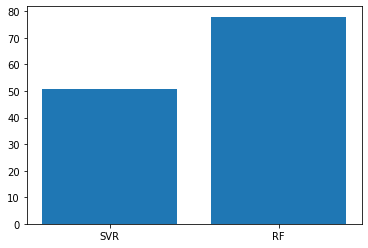

In [ ]:
plt.bar(['SVR', 'RF'], [p5_svr_accuracy, p5_rf_accuracy])
plt.show

### 5.6 Variable Importance Factor for RF Model
Displaying the variable importance could show us which factor is the most important one in decising the deathIncrease in our model.

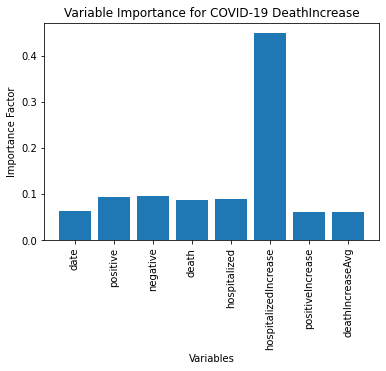

In [ ]:
p5_importances = list(p5_rf.feature_importances_)
p5_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(p5_f_list, p5_importances)]
p5_feature_importances = sorted(p5_feature_importances, key = lambda i: i[1], reverse = True)
plt.bar(list(range(len(p5_importances))), p5_importances)
plt.xticks(list(range(len(p5_importances))), p5_f_list, rotation="vertical")
plt.xlabel('Variables')
plt.ylabel('Importance Factor')
plt.title('Variable Importance for COVID-19 DeathIncrease')
plt.show()

## Reference and Resources

1. https://covidtracking.com/data
2. https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963
3. https://coronavirus.jhu.edu/data/mortality
4. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
5. https://en.wikipedia.org/wiki/Coronavirus
6. https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,average%20prediction%20(regression)%20of%20the
